In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as sig

We start by redoing the signal and analysis used in convolution

now, we make a time series of Brownian noise (biorealistic) time series not unlike EEG/LFP, representing one trial of neural mass data


Text(0.5, 1.0, 'One second of Brownian noise (simulated neural time series)')

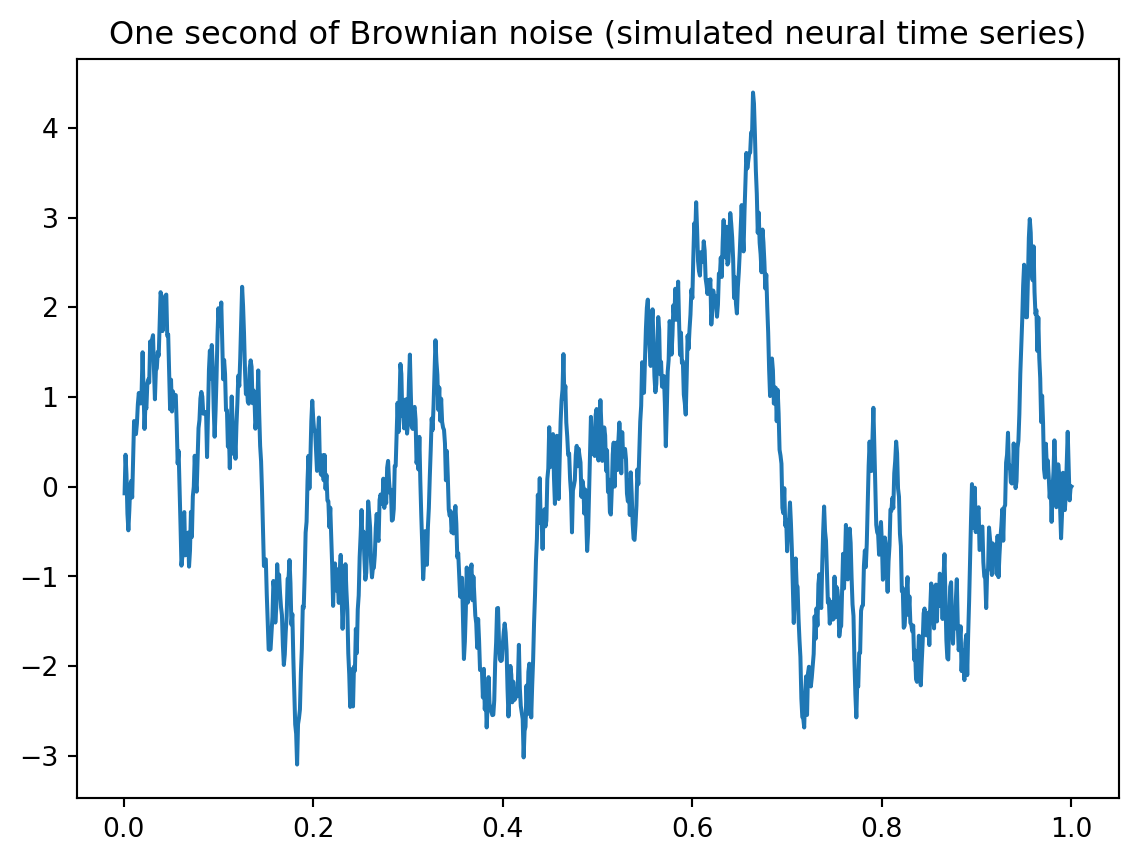

In [2]:
# np.random.seed(0)
time = np.linspace(0.001,1, 1000) # one second of discrete time, sampled at 1000 Hz

# set random number generator, for reproducibility

seed = 19 # set seed for reproducibility
temp = np.random.default_rng(seed=seed).uniform(0,1,1000)-0.5  # zero-centered white noise
#temp = temp*3.0e-10 # scale the white noise if needed

# If ``type == 'constant'``, only the mean of `data` is subtracted. #temp - np.mean(temp)
temp = sig.detrend(temp, type='linear',overwrite_data=True) 

#temp=np.random.uniform(low=0.0, high=1.0, size=(1000))-0.5 # zero-centered white noise
brownsig = np.cumsum(temp) # Brownian noise is the cumulative sum of white noise
brownsig = brownsig - np.mean(brownsig) # zero-centered Brownian noise


plt.plot(time,brownsig)
plt.title('One second of Brownian noise (simulated neural time series)')

In [3]:
#Now we make a simple signal, to be added to the brownian noise.
Sin10Hz = np.sin(2 * np.pi * time * 10) *3

#We start by making a discrete time vector, at which the signal will be sampled. 
time = np.linspace(0.001,1, 1000) # one second of discrete time, sampled at 1000 Hz

In [4]:
# SinWave = np.sin(2 * np.pi * time * 10.8) #a 10.8 Hz sine wave with amplitude 1
# testsig2  = brownsig - np.mean(brownsig) # zero-centered Brownian noise
# testsig1 = testsig2 + SinWave # add the sine wave
# testsig = sig.detrend(testsig1); # detrend

# fig,ax = plt.subplots(2,1)
# plt.subplot(2, 1, 1)
# plt.plot(time, brownsig)
# plt.title('The Brownian noise') # the real part
# plt.subplot(2, 1, 2)
# plt.plot(time, testsig)
# plt.title('The Brownian noise plus the 10.8 Hz sine wave') 

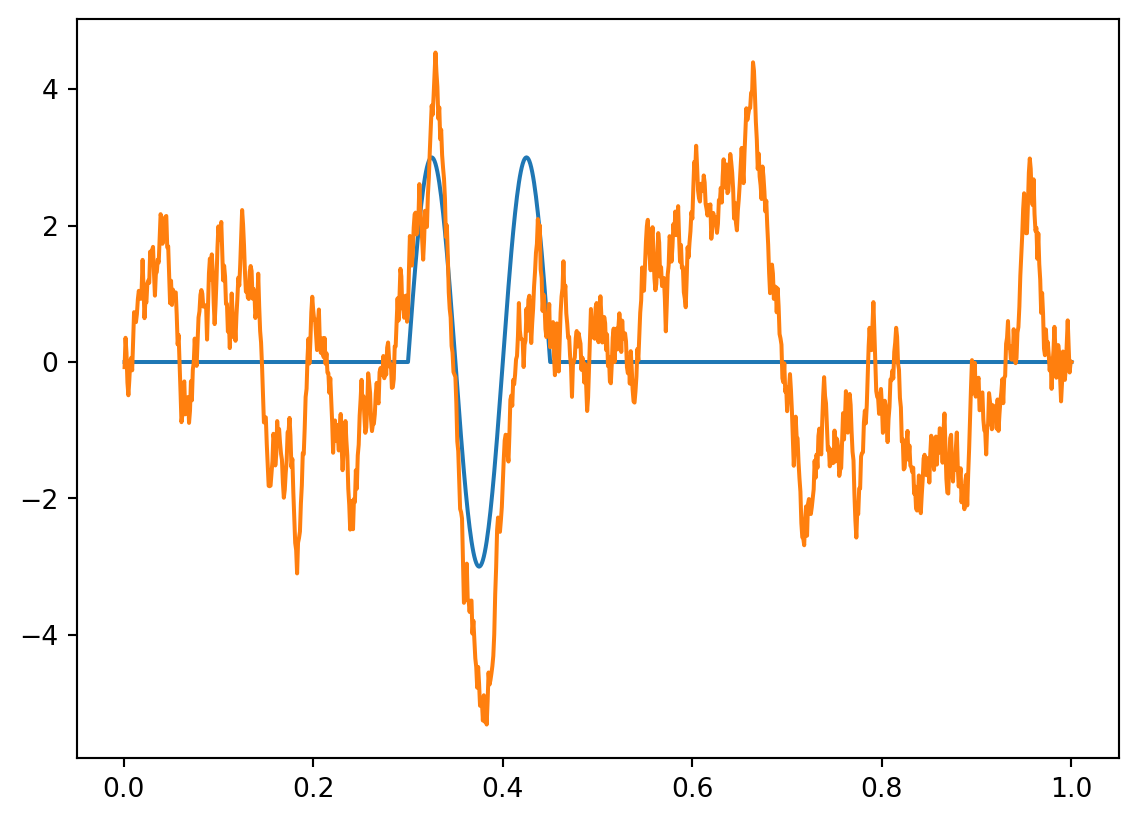

In [5]:
addsig = np.zeros(1000) # initialize the signal vector
addsig[300:450] = Sin10Hz[300:450] # add the 10 Hz sine wave to the signal vector
data1 = brownsig + addsig
plt.plot(time, addsig)
plt.plot(time, data1)   

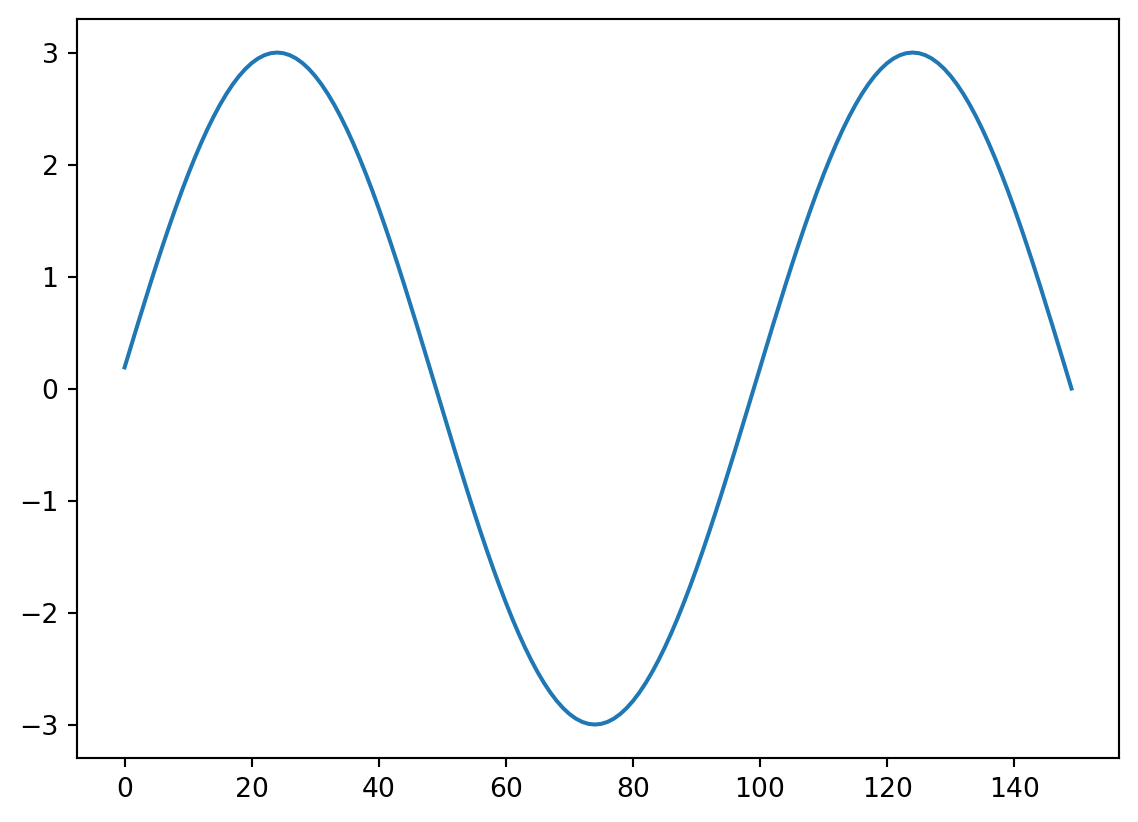

In [6]:
kernel=Sin10Hz[300:450]
kernlength = len(kernel)
plt.plot(kernel)

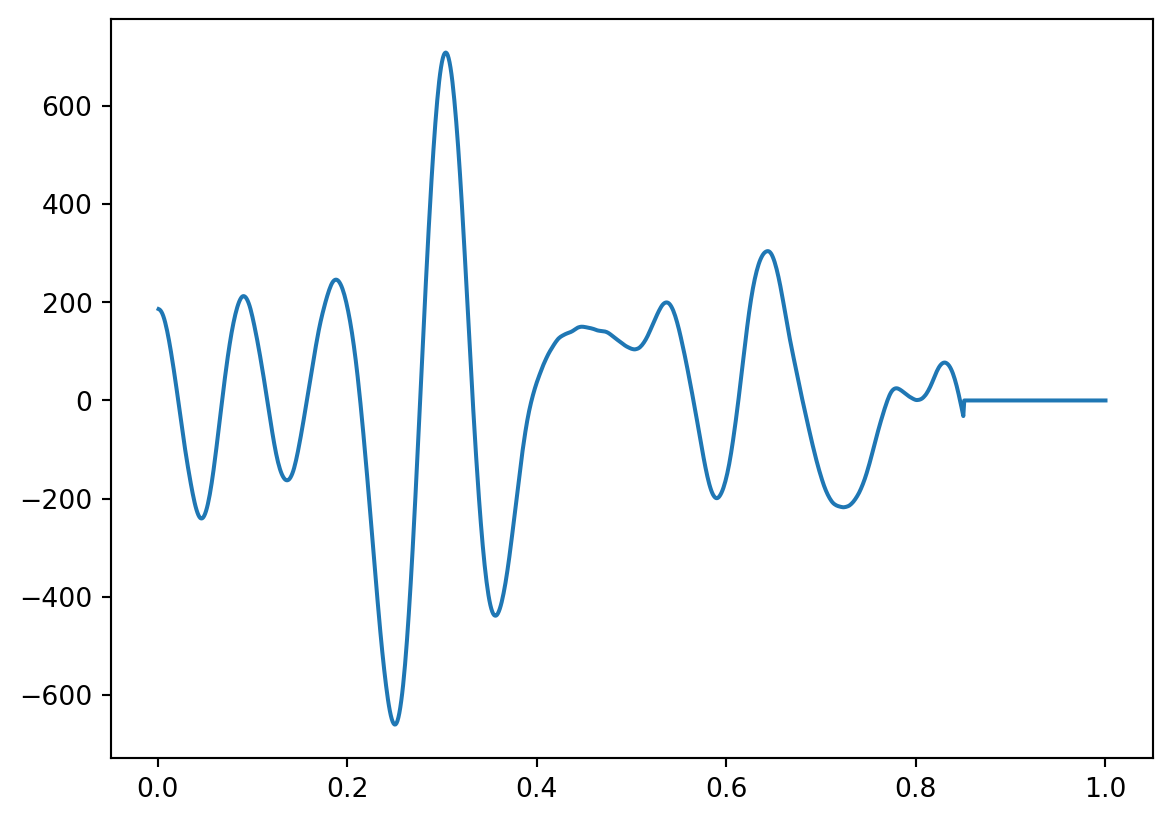

In [7]:
convbyhand=np.zeros(len(data1))
for i in range(0, len(data1)-kernlength):
    convbyhand[i] = np.dot(data1[i:i+kernlength], kernel.T) #the inner product of the kernel, shifted across the data
plt.plot(time,convbyhand)

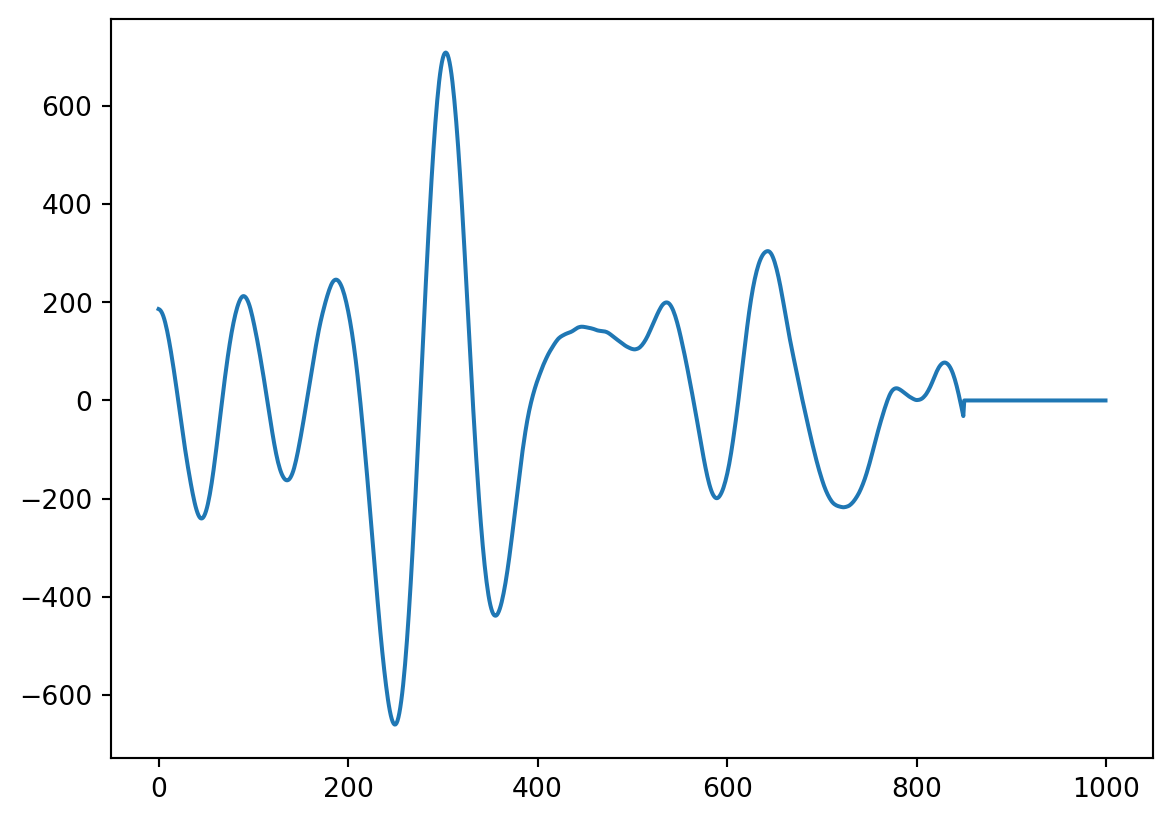

In [8]:
convbyhand=np.zeros(len(data1))
for i in range(0, len(data1)-kernlength):
    convbyhand[i] = np.dot(data1[i:i+kernlength], kernel) #the inner product of the kernel, shifted across the data
plt.plot(convbyhand)

It looks like the convolution picks up phase information as much as it does amplitide information. This is good, but it means one kernel with one phase may not be enough. Let's add the orthogonal Kernel, a cosine! 


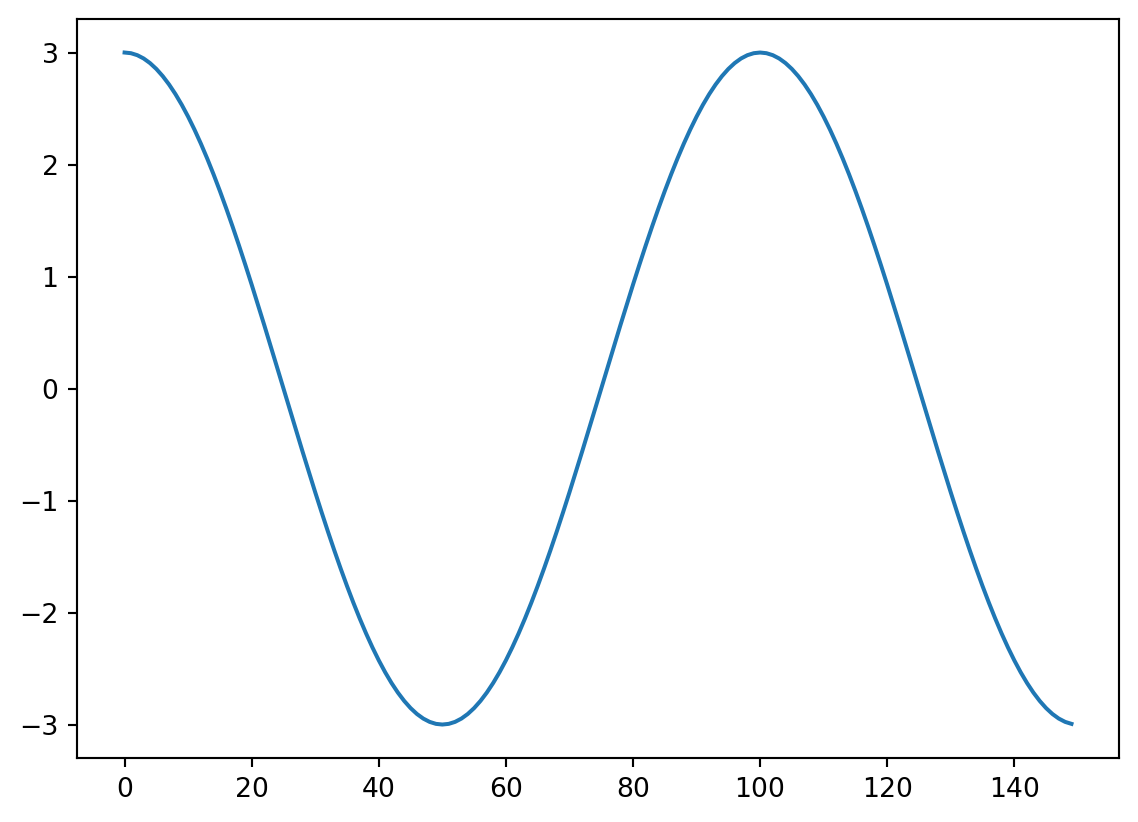

In [9]:
Cos10Hz = np.cos(2*np.pi*time*10)*3 # a 10 Hz cosine wave with 3 µV amplitude
kernel2 = Cos10Hz[299:449]
plt.plot(kernel2)

In [10]:
# plt.figure(figsize=(10,5))
# convbyhand1=np.zeros(len(data1))

# for i in range(0, len(data1)-kernlength):
#     convbyhand1[i] = np.dot(data1[i:i+kernlength], kernel) 
#     #convbyhand2[i] = np.dot(data1[i:i+kernlength], kernel2) 
#     plt.plot(np.hstack([np.zeros(i),kernel]))

In [11]:
kernlength

150

In [12]:
for ix,x in enumerate(np.arange(kernlength, len(data1)-kernlength,kernlength)):
    print(ix,x)

0 150
1 300
2 450
3 600
4 750


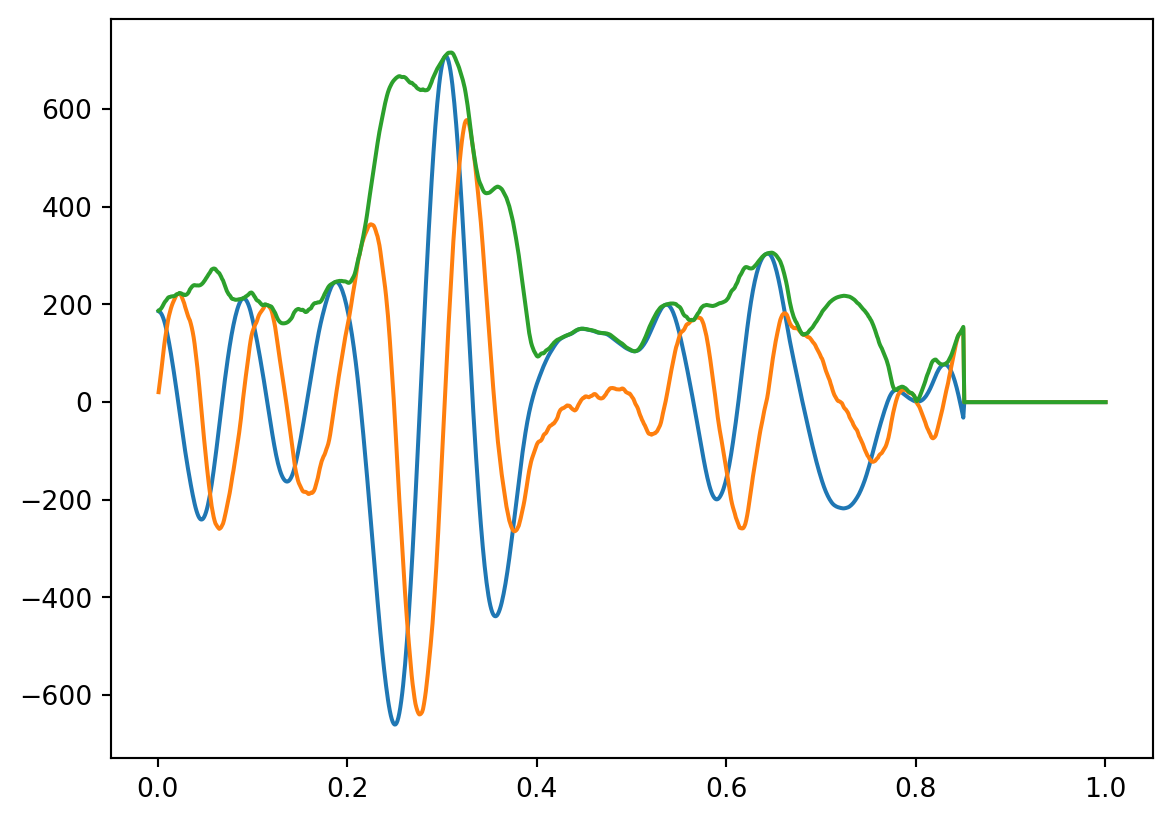

In [13]:
convbyhand1=np.zeros(len(data1))
convbyhand2=np.zeros(len(data1))
for i in range(0, len(data1)-kernlength):
    convbyhand1[i] = np.dot(data1[i:i+kernlength], kernel.T)
    convbyhand2[i] = np.dot(data1[i:i+kernlength], kernel2.T)
plt.plot(time,convbyhand1)
plt.plot(time,convbyhand2)
plt.plot(time,np.abs(convbyhand2 + 1j*convbyhand1))


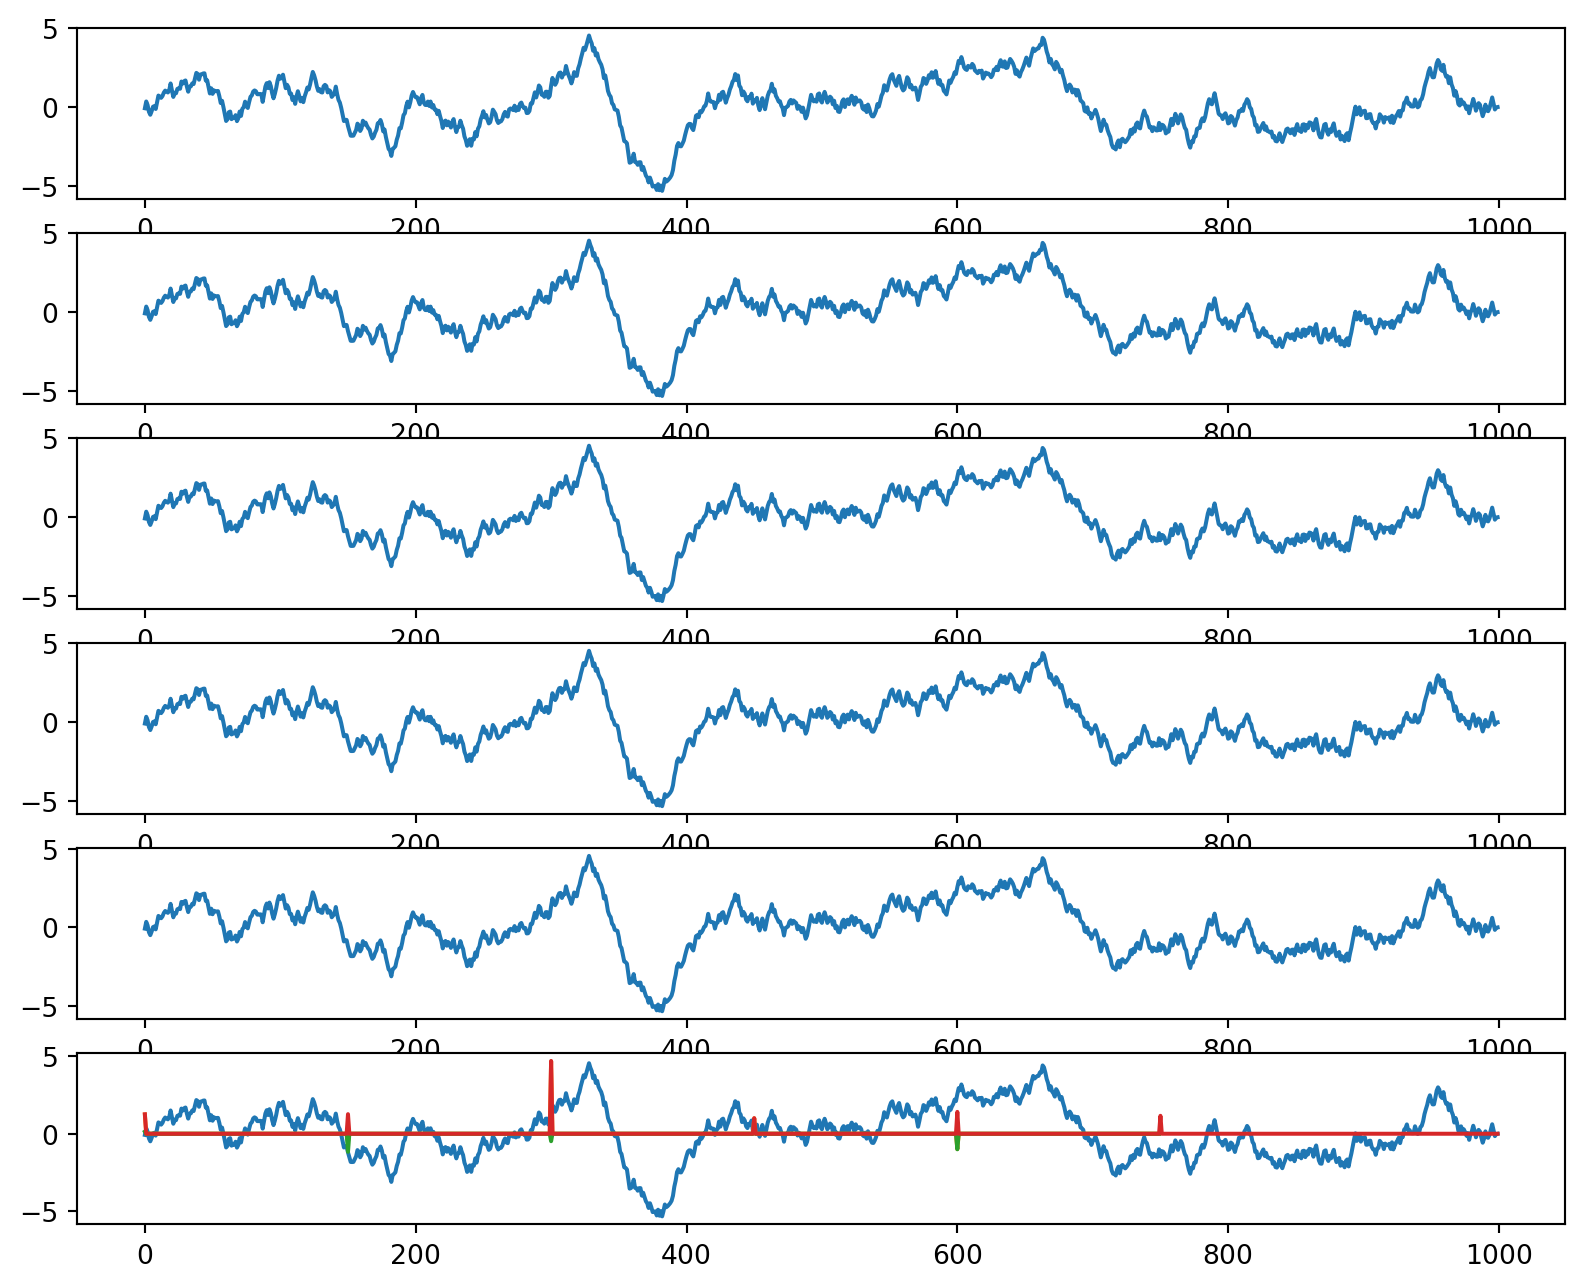

In [14]:
plt.figure(figsize=(10,40))
convbyhand1=np.zeros(len(data1))
convbyhand2=np.zeros(len(data1))

for ix,x in enumerate(np.arange(0,len(data1)-kernlength,150)):
    plt.subplot(29,1,ix+1)
    plt.plot(data1)
    convbyhand1[x] = np.dot(data1[x:x+kernlength], kernel.T) #the inner product of the kernel, shifted across the data

    convbyhand2[x] = np.dot(data1[x:x+kernlength], kernel2.T) #the inner product of the kernel, shifted across the data
plt.plot(convbyhand1[0:x]/150)
plt.plot(convbyhand2[0:x]/150)
plt.plot(np.abs(convbyhand2 + 1j*convbyhand1)/150)
    # convbyhand[x] = np.dot(data1[x:x+kernlength], kernel2) #the inner product of the kernel, shifted across the data
    # plt.plot(convbyhand[1:x]/150)
    #plt.plot(convbyhand2[1:x]/150)

    #convbyhand1[x] = np.dot(data1[x:x+kernlength], kernel) 
    #convbyhand2[x] = np.dot(data1[x:x+kernlength], kernel2) #data1[x-kernlength:x]
    #plt.plot(np.hstack([np.zeros(x-kernlength),kernel]))
    #plt.plot(np.hstack([np.zeros(x-kernlength),kernel2]))
            # plt.plot(data1[x-kernlength:x])
    #plt.plot(convbyhand1[1:x]/150)
    #plt.plot(convbyhand2[1:x]/150)
        #plt.plot(np.abs(convbyhand2 + 1j*convbyhand1)/150)
        #plt.xlim(0,100)
        #plt.ylim(-5,5)

# for i in range(0, len(data1)-kernlength):
#     convbyhand1[i] = np.dot(data1[i:i+kernlength], kernel) 
#     convbyhand2[i] = np.dot(data1[i:i+kernlength], kernel2) 
#     plt.plot(np.hstack([np.zeros(i),kernel]))
#     plt.plot(convbyhand1[1:i]/150)
#     plt.plot(convbyhand2[1:i]/150)

#plt.plot(np.abs(convbyhand2 + 1j*convbyhand1)/150)

# plt.figure(figsize=(10,5))
# addsig = np.zeros(1000) # initialize the signal vector
# addsig[300:450] = Sin10Hz[300:450] # add the 10 Hz sine wave to the signal vector
# data1 = brownsig + addsig

# plt.plot(time, addsig,lw=1.5,alpha=0.3,color='C3',label='10 Hz Segment 3µV(0.3 to 0.45)')
# plt.plot(time, data1,ls='-',lw=0.75,color='C2',label='Brownian noise + segment')
# plt.plot(time, brownsig,lw=0.5,color='k',alpha=1,label='Brownian noise')
# plt.legend(loc='upper right',bbox_to_anchor=(1, 1.02),framealpha=0.1)
# plt.title('One second of Brownian noise added with a 10 Hz segment')

In [15]:

# figure
# for x = 1:size(data1,2)-kernlength
#     convbyhand1(x) = data1(x:x+kernlength-1)*kernel';
#     convbyhand2(x) = data1(x:x+kernlength-1)*kernel2';
#     plot(data1), hold on
#     plot([zeros(1,x) kernel2], 'g', 'LineWidth',2),  
#     plot(convbyhand1(1:x)./150, 'r', 'LineWidth',2), % divide by length of kernel to keep same scale
#     plot(convbyhand2(1:x)./150, 'm', 'LineWidth',2), % divide by length of kernel to keep same scale
#     pause(.01), hold off 
# end
# hold on 
# plot(abs(convbyhand2 + 1i*convbyhand1)./150, 'k', 'LineWidth',3)


There are many thing one could manipulate and illustrate now, but let's see what happens if I just increase the signal-to-noise ratio of the test signal (the sine wave embedded in the brownian noise)

In [16]:
# data2 = brownsig + addsig.*2; 

In [17]:

# time = 0.001:0.001:1; % one second of discrete time, sampled at 1000 Hz
# now, we make a time series of Brownian noise (biorealistic) time series not unlike EEG/LFP, representing one trial of neural mass data
# rng(080769) % set random number generator, for repproducibility
# temp1 = rand(size(time))-.5; % zero-center the white noise, because we use cumulative sum later
# brownsig = cumsum(temp1);  % Brownian noise is the cumulative sum of white noise
# brownsig = detrend(brownsig);
# figure
# plot(time, brownsig),title('One second of Brownian noise (simulated neural time series)') 

# Now we make a simple signal, to be added to the brownian noise.
# Sin10Hz = sin(2*pi*time*10).*3 ; % a 10 Hz sine wave with 3 µV amplitude
# addsig = zeros(size(brownsig)); 
# addsig(301:450) = Sin10Hz(301:450);
# data1 = brownsig + addsig; 
# plot(time, addsig), hold on
# plot(time, data1); title('The test data') 

# Now we need a kernel, let's take our added signal and see if we find it! 
# kernel = Sin10Hz(301:450); 
# kernlength = length(kernel)
# figure, plot(kernel)

# Now the convolution. let's do it step by step again for this example, by using the dot product 

# ###-----   ######   -----###
# figure
# for x = 1:size(data1,2)-kernlength
#     convbyhand(x) = data1(x:x+kernlength-1)*kernel';
#     plot(data1), hold on
#     plot([zeros(1,x) kernel], 'g', 'LineWidth',2),  
#     plot(convbyhand(1:x)./150, 'r', 'LineWidth',2), % divide by length of kernel to keep same scale
#     pause(.01), hold off 
# end


# It looks like the convolution picks up phase information as much as it does amplitide information. This is good, but it means one kernel with one phase may not be enough. Let's add the orthogonal Kernel, a cosine! 
# Cos10Hz = cos(2*pi*time*10).*3 ; % a 10 Hz cosine wave with 3 µV amplitude
# kernel2 = Cos10Hz(301:450);

# figure
# for x = 1:size(data1,2)-kernlength
#     convbyhand1(x) = data1(x:x+kernlength-1)*kernel';
#     convbyhand2(x) = data1(x:x+kernlength-1)*kernel2';
#     plot(data1), hold on
#     plot([zeros(1,x) kernel2], 'g', 'LineWidth',2),  
#     plot(convbyhand1(1:x)./150, 'r', 'LineWidth',2), % divide by length of kernel to keep same scale
#     plot(convbyhand2(1:x)./150, 'm', 'LineWidth',2), % divide by length of kernel to keep same scale
#     pause(.01), hold off 
# end
# hold on 
# plot(abs(convbyhand2 + 1i*convbyhand1)./150, 'k', 'LineWidth',3)

# There are many thing one could manipulate and illustrate now, but let's see what happens if I just increase the signal-to-noise ratio of the test signal (the sine wave embedded in the brownian noise)
# data2 = brownsig + addsig.*2; 

# figure
# for x = 1:size(data2,2)-kernlength
#     convbyhand1(x) = data2(x:x+kernlength-1)*kernel';
#     convbyhand2(x) = data2(x:x+kernlength-1)*kernel2';
#     plot(data2), hold on
#     plot([zeros(1,x) kernel2], 'g', 'LineWidth',2),  
#     plot(convbyhand1(1:x)./150, 'r', 'LineWidth',2), % divide by length of kernel to keep same scale
#     plot(convbyhand2(1:x)./150, 'm', 'LineWidth',2), % divide by length of kernel to keep same scale
#     pause(.01), hold off 
# end
# hold on 
# plot(abs(convbyhand2 + 1i*convbyhand1)./150, 'k', 'LineWidth',3)
# plot(addsig, 'b', 'LineWidth',3)
 